In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as m 

In [2]:
df = pd.read_csv('E:/ML and DL/ML/Data_csv/kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
df.dtypes

Kyphosis    object
Age          int64
Number       int64
Start        int64
dtype: object

In [4]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Kyphosis,81,2,absent,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,81.0,NaN,NaN,NaN,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,NaN,NaN,NaN,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,NaN,NaN,NaN,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


<AxesSubplot:>

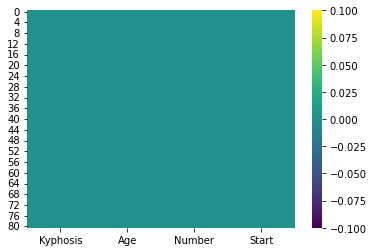

In [5]:
sns.heatmap(df.isnull(),cmap = 'viridis')

In [6]:
df.isna().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [9]:
from datasist.structdata import detect_outliers

feature_df = df[['Age','Number','Start']]

for col in feature_df:
    outliers = detect_outliers(df,0,[col])
    print(f'number of outliers in {col} : ',len(outliers))

number of outliers in Age :  0
number of outliers in Number :  2
number of outliers in Start :  0


In [10]:
for col in feature_df:
    outliers = detect_outliers(df,0,[col])
    col_median = df[col].median()
    df[col].iloc[outliers] = col_median

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [11]:
from datasist.structdata import detect_outliers

feature_df = df[['Age','Number','Start']]

for col in feature_df:
    outliers = detect_outliers(df,0,[col])
    print(f'number of outliers in {col} : ',len(outliers))

number of outliers in Age :  0
number of outliers in Number :  0
number of outliers in Start :  0


In [12]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [13]:
df['Kyphosis'].value_counts() * 100 / len(df)

absent     79.012346
present    20.987654
Name: Kyphosis, dtype: float64

<AxesSubplot:>

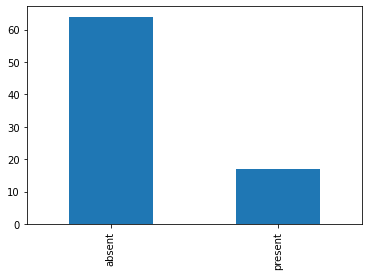

In [14]:
df['Kyphosis'].value_counts().plot(kind = 'bar')

In [15]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = ['Age','Number','Start']
df[columns] = scaler.fit_transform(df[columns])
df.head()

,Kyphosis,Age,Number,Start
0,absent,-0.219143,-0.674962,-1.337907
1,absent,1.287494,-0.674962,0.516341
2,present,0.767964,0.063848,-1.337907
3,absent,-1.414063,0.802658,-2.162017
4,absent,-1.431381,0.063848,0.722368


In [17]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [18]:
df['Kyphosis'] = df['Kyphosis'].replace({'absent':0,'present':1})

In [19]:
feature_df = df[['Age','Number','Start']]
x = np.asarray(feature_df)
y = np.asarray(df['Kyphosis'])

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 27)
x_train,y_train = sm.fit_resample(x_train,y_train)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(random_state=0, max_depth=2)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.8235294117647058

In [23]:
from sklearn.metrics import confusion_matrix,classification_report


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[12  2]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.50      0.67      0.57         3

    accuracy                           0.82        17
   macro avg       0.71      0.76      0.73        17
weighted avg       0.85      0.82      0.83        17



In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
parameters = {'n_neighbors': [1, 2, 5, 10], 'weights': ['uniform', 'distance'], 'metric': ['manhattan', 'euclidean', 'chebyshev']}
def grid_search(estimator, parameters, X, y):
    
    scoring = ['accuracy', 'precision', 'recall']
    kf = KFold(5)
    
    clf = GridSearchCV(estimator, parameters, cv=kf, scoring=scoring, refit="accuracy", n_jobs=-1)
    clf.fit(X, y)
    
    i = clf.best_index_
    best_precision = clf.cv_results_['mean_test_precision'][i]
    best_recall = clf.cv_results_['mean_test_recall'][i]
    
    print('Best score (accuracy): {}'.format(clf.best_score_))
    print('Mean precision: {}'.format(best_precision))
    print('Mean recall: {}'.format(best_recall))
    print('Best parametes: {}'.format(clf.best_params_))
    
    return clf.best_estimator_
from sklearn.neighbors import KNeighborsClassifier
grid_search(KNeighborsClassifier(n_jobs=-1),parameters,x_train,y_train)

Best score (accuracy): 0.89
Mean precision: 0.8444444444444444
Mean recall: 0.8775000000000001
Best parametes: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=1)

In [25]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 1, weights = 'uniform')
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [26]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  4]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.20      0.33      0.25         3

    accuracy                           0.65        17
   macro avg       0.52      0.52      0.51        17
weighted avg       0.72      0.65      0.68        17



In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k = [1,2,3,4,5,6,7,8,9,int(m.sqrt(len(x_train)))]
for item in k :
    print(f'where k is = {item}')
    model = KNeighborsClassifier(n_neighbors = item)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('accuracy is {}'.format(accuracy_score(y_test,y_pred)))
    print('-'*30)

where k is = 1
accuracy is 0.6470588235294118
------------------------------
where k is = 2
accuracy is 0.6470588235294118
------------------------------
where k is = 3
accuracy is 0.6470588235294118
------------------------------
where k is = 4
accuracy is 0.6470588235294118
------------------------------
where k is = 5
accuracy is 0.7647058823529411
------------------------------
where k is = 6
accuracy is 0.6470588235294118
------------------------------
where k is = 7
accuracy is 0.7647058823529411
------------------------------
where k is = 8
accuracy is 0.6470588235294118
------------------------------
where k is = 9
accuracy is 0.7058823529411765
------------------------------
where k is = 10
accuracy is 0.6470588235294118
------------------------------


In [28]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
y_pred = log_model.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[9 5]
 [2 1]]
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        14
           1       0.17      0.33      0.22         3

    accuracy                           0.59        17
   macro avg       0.49      0.49      0.47        17
weighted avg       0.70      0.59      0.63        17



In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf_params = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5],
    'random_state': [42]
}

rf_search = GridSearchCV(rf, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_search.fit(x_train, y_train)
best_mse = rf_search.best_score_
best_rmse = best_mse

print('Best score: {}, Best params: {}'.format(round(best_rmse, 4), rf_search.best_params_))

Best score: 0.91, Best params: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}


In [32]:
rf = RandomForestClassifier(max_depth = 7, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100, random_state = 42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  4]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.33      0.67      0.44         3

    accuracy                           0.71        17
   macro avg       0.62      0.69      0.62        17
weighted avg       0.81      0.71      0.74        17



In [34]:
from sklearn.svm import SVC
clf = SVC()
params = {'C':[1,5,7] ,'kernel':['linear','poly','rbf','sigmoid']}
grid_search = GridSearchCV(clf,param_grid = params,cv = 5)
grid_search.fit(x_train,y_train)
grid_search.best_params_
grid_search.cv_results_

{'mean_fit_time': array([0.00116796, 0.00081859, 0.00059576, 0.00069928, 0.00105286,
        0.00081992, 0.00101829, 0.00039988, 0.00079975, 0.00099993,
        0.00079985, 0.00019922]),
 'std_fit_time': array([7.70223172e-04, 4.10797733e-04, 4.86713889e-04, 3.99768682e-04,
        1.06574012e-04, 4.12366999e-04, 7.88002800e-05, 4.89749563e-04,
        3.99878569e-04, 2.32626170e-06, 3.99923453e-04, 3.98445129e-04]),
 'mean_score_time': array([0.00018926, 0.00039744, 0.00040722, 0.00019965, 0.00060239,
        0.00019851, 0.00044727, 0.00040002, 0.00020051, 0.        ,
        0.00019999, 0.        ]),
 'std_score_time': array([0.00023262, 0.00048677, 0.00049886, 0.0003993 , 0.00080111,
        0.00039701, 0.00055344, 0.00048993, 0.00040102, 0.        ,
        0.00039997, 0.        ]),
 'param_C': masked_array(data=[1, 1, 1, 1, 5, 5, 5, 5, 7, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        f

In [36]:
clf = SVC(C = 5, kernel = 'poly')

In [37]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [38]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  4]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.20      0.33      0.25         3

    accuracy                           0.65        17
   macro avg       0.52      0.52      0.51        17
weighted avg       0.72      0.65      0.68        17



In [39]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold

crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=crossvalidation)
search.fit(x_train,y_train)
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000, 'random_state': 1}

In [40]:
ada = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 2000, random_state = 1)
ada.fit(x_train,y_train)
y_pred = ada.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[13  1]
 [ 3  0]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.00      0.00      0.00         3

    accuracy                           0.76        17
   macro avg       0.41      0.46      0.43        17
weighted avg       0.67      0.76      0.71        17



In [41]:
from catboost import CatBoostClassifier
CBC = CatBoostClassifier()
parameters = {'depth'         : [4,5,6,7,8,9, 10],
              'learning_rate' : [0.01,0.02,0.03,0.04],
              'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
Grid_CBC = GridSearchCV(estimator=CBC, param_grid = parameters, cv = 2, n_jobs=-1)
Grid_CBC.fit(x_train, y_train)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",Grid_CBC.best_estimator_)
print("\n The best score across ALL searched params:\n",Grid_CBC.best_score_)
print("\n The best parameters across ALL searched params:\n",Grid_CBC.best_params_)

0:	learn: 0.6904585	total: 53ms	remaining: 477ms
1:	learn: 0.6876666	total: 56.5ms	remaining: 226ms
2:	learn: 0.6848639	total: 59.8ms	remaining: 139ms
3:	learn: 0.6820624	total: 62.6ms	remaining: 93.9ms
4:	learn: 0.6799988	total: 65.3ms	remaining: 65.3ms
5:	learn: 0.6775444	total: 68.1ms	remaining: 45.4ms
6:	learn: 0.6749866	total: 70.9ms	remaining: 30.4ms
7:	learn: 0.6723473	total: 74ms	remaining: 18.5ms
8:	learn: 0.6705397	total: 76.5ms	remaining: 8.5ms
9:	learn: 0.6681715	total: 79.4ms	remaining: 0us
 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.89

 The best parameters across ALL searched params:
 {'depth': 8, 'iterations': 10, 'learning_rate': 0.01}


In [42]:
cbc = CatBoostClassifier(depth = 8, iterations = 10, learning_rate = 0.01)
cbc.fit(x_train,y_train)
y_pred = cbc.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0:	learn: 0.6904585	total: 1.69ms	remaining: 15.2ms
1:	learn: 0.6876666	total: 3.17ms	remaining: 12.7ms
2:	learn: 0.6848639	total: 4.22ms	remaining: 9.86ms
3:	learn: 0.6820624	total: 5.6ms	remaining: 8.41ms
4:	learn: 0.6799988	total: 6.74ms	remaining: 6.74ms
5:	learn: 0.6775444	total: 7.85ms	remaining: 5.23ms
6:	learn: 0.6749866	total: 8.93ms	remaining: 3.83ms
7:	learn: 0.6723473	total: 9.98ms	remaining: 2.49ms
8:	learn: 0.6705397	total: 11.3ms	remaining: 1.25ms
9:	learn: 0.6681715	total: 13.2ms	remaining: 0us
[[10  4]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.33      0.67      0.44         3

    accuracy                           0.71        17
   macro avg       0.62      0.69      0.62        17
weighted avg       0.81      0.71      0.74        17



In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier(random_state=42)
gbr_params = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 80, 100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 5],
    'random_state': [42]
}

gbr_search = GridSearchCV(gbr, param_grid=gbr_params, cv=5, scoring='accuracy', n_jobs=-1)
gbr_search.fit(x_train, y_train)
best_mse = gbr_search.best_score_
best_rmse = best_mse

print('Best score: {}, Best params: {}'.format(best_rmse, gbr_search.best_params_))

Best score: 0.9400000000000001, Best params: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'random_state': 42}


In [44]:
gbr = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 5, min_samples_leaf = 2, min_samples_split = 5, n_estimators = 50, random_state = 42)
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[12  2]
 [ 1  2]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.50      0.67      0.57         3

    accuracy                           0.82        17
   macro avg       0.71      0.76      0.73        17
weighted avg       0.85      0.82      0.83        17



In [45]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42)
lgbm_params = {
    'num_leaves': [25, 31, 35],
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 7, 11],
    'random_state': [42]
}

lgbm_search = GridSearchCV(lgbm, param_grid=lgbm_params, cv=5, scoring='accuracy', n_jobs=-1)
lgbm_search.fit(x_train, y_train)
best_mse = lgbm_search.best_score_
best_rmse = best_mse

print('Best score: {}, Best params: {}'.format(best_rmse, lgbm_search.best_params_))

Best score: 0.9200000000000002, Best params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000, 'num_leaves': 25, 'random_state': 42}


In [46]:
lgbm = LGBMClassifier(learning_rate = 0.1, max_depth = 3, n_estimators = 1000, num_leaves = 25, random_state = 42)
lgbm.fit(x_train,y_train)
y_pred = lgbm.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11  3]
 [ 2  1]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       0.25      0.33      0.29         3

    accuracy                           0.71        17
   macro avg       0.55      0.56      0.55        17
weighted avg       0.74      0.71      0.72        17



In [47]:
import joblib
joblib.dump(gbr,'D:/projects/ML/Keyphosis/model.h5')
joblib.dump(scaler,'D:/projects/ML/Keyphosis/scaler.h5')

['D:/projects/ML/Keyphosis/scaler.h5']